CNN Architecture for the model

In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
DATASET_PATH="data_5.json"

# load data from json
with open(DATASET_PATH, "r") as fp:
    data = json.load(fp)

# convert lists into numpy arrays 
x = np.array(data["mfcc"])
y = np.array(data["labels"])

In [3]:
# create train, validation and test sets
TEST_SIZE=0.25
VAL_SIZE=0.2 

# create train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=TEST_SIZE)
    
# create train/val split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=VAL_SIZE)

# 3d array -> 4d array ( , , , 1 )
x_train = x_train[..., np.newaxis] # 4d -> (num_samples, 130, 13, 1) 
x_val = x_val[..., np.newaxis] 
x_test = x_test[..., np.newaxis] 


In [4]:
# input shape
input_shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3])
input_shape

(259, 13, 1)

In [5]:
# Build CNN network
model = keras.Sequential()
model.add(keras.layers.Input(shape=input_shape))

# 1st con layer
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu')) # num_kernels, grid_size_of_kernel, ...
model.add(keras.layers.MaxPool2D((3,3), strides=(2,2), padding='same')) # pool_size
model.add(keras.layers.BatchNormalization()) # normalize the layers and models gonna be faster 

# 2nd con layer
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(keras.layers.MaxPool2D((3,3), strides=(2,2), padding='same'))
model.add(keras.layers.BatchNormalization())

# 3rd con layer
model.add(keras.layers.Conv2D(32, (2, 2), activation='relu', input_shape=input_shape))
model.add(keras.layers.MaxPool2D((2,2), strides=(2,2), padding='same'))
model.add(keras.layers.BatchNormalization())

# Flatten the output and feed it into dense layer
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.3))

# output layer
model.add(keras.layers.Dense(3, activation='softmax'))

C:\Users\Lakindu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# compile the network
# compile network
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
             )

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 257, 11, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 129, 6, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 129, 6, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 127, 4, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 2, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 2, 32)           │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 1, 32)           │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 1, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 1, 32)           │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,875 (312.01 KB)

 Trainable params: 79,683 (311.26 KB)

 Non-trainable params: 192 (768.00 B)

In [7]:
# train the CNN 
history = model.fit(
    x_train, 
    y_train,  
    validation_data=(x_val, y_val),
    epochs=30,
    batch_size=32
)

Epoch 1/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.5531 - loss: 1.1236 - val_accuracy: 0.7048 - val_loss: 0.7412
Epoch 2/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.7955 - loss: 0.5751 - val_accuracy: 0.7349 - val_loss: 0.6367
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8535 - loss: 0.3934 - val_accuracy: 0.7711 - val_loss: 0.5202
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8825 - loss: 0.3035 - val_accuracy: 0.7771 - val_loss: 0.4750
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.8965 - loss: 0.2803 - val_accuracy: 0.7651 - val_loss: 0.4641
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9172 - loss: 0.2201 - val_accuracy: 0.7711 - val_loss: 0.4556
Epoch 7/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9137 - loss: 0.2312 - val_accuracy: 0.7892 - val_loss: 0.4143
Epoch 8/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9236 - loss: 0.1922 - val_accuracy: 0.7892 - v

In [14]:
# evaluate the CNN on the test_set
test_error, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"Accuracy on test set is: {test_accuracy}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9283 - loss: 0.2003
Accuracy on test set is: 0.9057971239089966


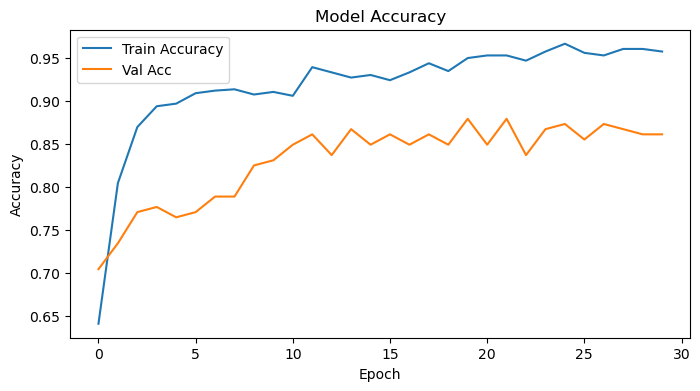

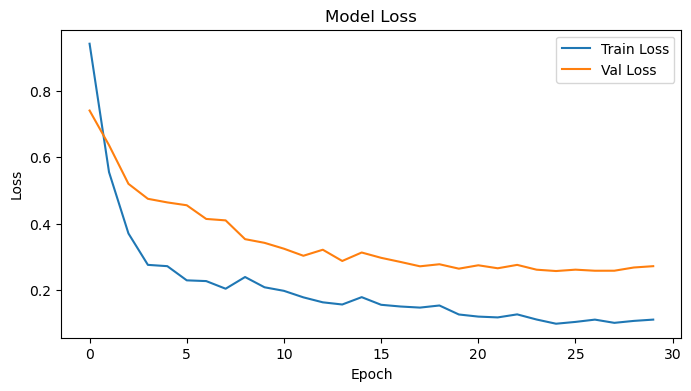

In [15]:
# Plot Training History for Accuracy
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot Training History for Loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [20]:
# make predictions on a sample test data
X = x_test[100]
Y = y_test[100]

X = X[np.newaxis, ...]
prediction = model.predict(X)

# extract index with max value
predicted_index = np.argmax(prediction, axis=1) 

print(f"Expected index: {Y}, \nPredicted Index: {predicted_index[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
Expected index: 0, 
Predicted Index: 0


classification report

In [22]:
# Classification Report
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1) 
y_true_classes = y_test

# Define your class names
class_names = ['abnormal', 'artifact', 'normal']

# Get report
report = classification_report(y_true_classes, y_pred_classes, target_names=class_names)
print(report)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
              precision    recall  f1-score   support

    abnormal       0.97      0.92      0.94       217
    artifact       0.64      1.00      0.78         7
      normal       0.74      0.83      0.78        52

    accuracy                           0.91       276
   macro avg       0.78      0.92      0.83       276
weighted avg       0.92      0.91      0.91       276



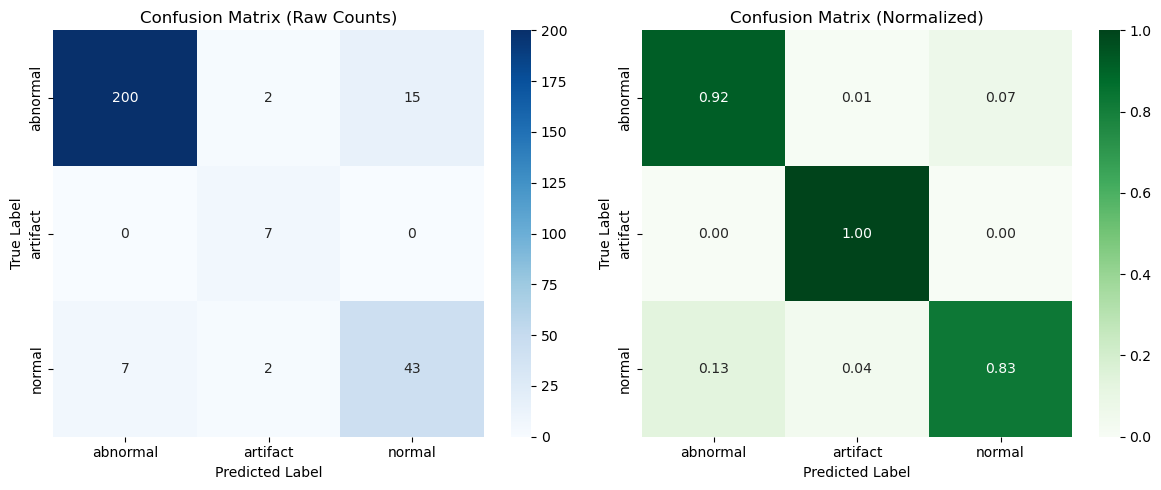

In [24]:
# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Class names
class_names = ['abnormal', 'artifact', 'normal']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Raw Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_title('Confusion Matrix (Raw Counts)')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot 2: Normalized Confusion Matrix
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names, ax=axes[1])
axes[1].set_title('Confusion Matrix (Normalized)')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

In [26]:
# as a keras model
model.save('models/heart_sound_model5_v3_0001.keras')
# as a h5 model
model.save("models/heart_sound_model5_v3_0001.h5")

In [ ]:
from ipywidgets import FileUpload